In [23]:
import numpy        as np
import os
from os             import listdir
from datetime       import datetime
import matplotlib.pyplot as plt
import matplotlib        as mpl
from natsort import natsorted

import json

import sys
sys.path.append('/STER/silkem/ChemTorch/')
import modclass

### ChemTorch - scipy ODE solver

In [24]:
outpath = '/STER/silkem/ChemTorch/out/'
## scipy implementation
dirname = 'bm_C_Mdot1e-8_v2-5'

## load 0D model dirs
dirs = listdir(outpath+dirname+'/')
dirs.remove('meta.json')
dirs = natsorted(dirs)

## load meta file
with open(outpath+dirname+'/meta.json', 'r') as f:
    meta=f.read()

meta = json.loads(meta)

In [25]:
meta

{'1Dmodel': '/STER/silkem/CSEchem/20210518_gridC_Mdot1e-8_v2-5_T_eps-model_2022-12-24h23-19-06',
 'Mdot': 1e-08,
 'v': 2.5,
 'eps': 0.6,
 'T_star': 2500,
 'solvertype': 'scipy'}

In [26]:
abs = []
p = []
dt = []
solver_time = []
overhead = []

for i in range(len(dirs)):
    chem = modclass.ChemTorchMod(dirname, dirs[i])
    abs.append(chem.n.T[-1])
    dt.append(chem.tstep[-1])
    p.append(chem.p)
    solver_time.append(chem.tictoc[0])
    overhead.append(chem.tictoc[1])

abs = np.array(abs)
p = np.array(p)
dt = np.array(dt)
solver_time = np.array(solver_time)
overhead = np.array(overhead)

In [21]:
dt

array([5.480e+07, 6.160e+07, 6.880e+07, 7.720e+07, 8.680e+07, 9.760e+07,
       1.092e+08, 1.224e+08, 1.376e+08, 1.544e+08, 1.732e+08, 1.944e+08,
       2.180e+08, 2.444e+08, 2.748e+08, 3.076e+08, 3.456e+08, 3.880e+08,
       4.348e+08, 4.880e+08, 5.480e+08, 6.160e+08, 6.880e+08, 7.720e+08,
       8.680e+08, 9.760e+08, 1.092e+09, 1.224e+09, 1.376e+09, 1.544e+09,
       1.732e+09, 1.944e+09, 2.180e+09, 2.444e+09, 2.748e+09, 3.076e+09,
       3.456e+09, 3.880e+09, 4.348e+09, 4.880e+09, 5.480e+09, 6.160e+09,
       6.880e+09, 7.720e+09, 8.680e+09, 9.760e+09, 1.092e+10, 1.224e+10,
       1.376e+10, 1.544e+10, 1.732e+10, 1.944e+10, 2.180e+10, 2.444e+10,
       2.748e+10, 3.076e+10, 3.456e+10, 3.880e+10, 4.348e+10, 4.880e+10,
       5.480e+10, 6.160e+10, 6.880e+10, 7.720e+10, 8.680e+10, 9.760e+10,
       1.092e+11, 1.224e+11, 1.376e+11, 1.544e+11, 1.732e+11, 1.944e+11,
       2.180e+11, 2.444e+11, 2.748e+11, 3.076e+11, 3.456e+11, 3.880e+11,
       4.348e+11])

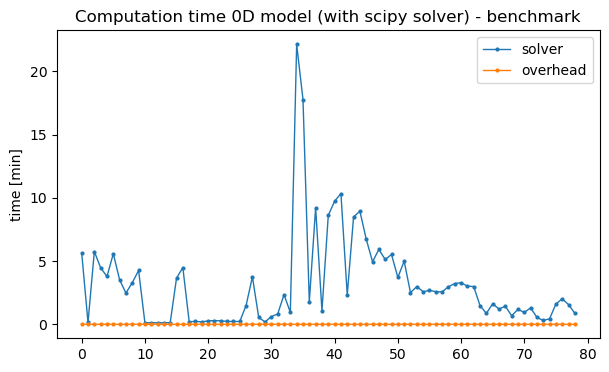

In [27]:
fig, ax1 = plt.subplots(figsize = (7,4)) 
ax1.set_title('Computation time 0D model (with scipy solver) - benchmark')

ax1.plot(solver_time * 1./60., '-o',ms = 2,lw = 1, label = 'solver')
ax1.plot(overhead * 1./60.  , '-o',ms = 2,lw = 1, label = 'overhead')

ax1.set_ylabel('time [min]')

plt.legend()
plt.show()

### 1D CSE model

In [28]:
CSEmodel = modclass.CSEmod(loc = 'STER', dir = meta['1Dmodel'][:-26], modelname = meta['1Dmodel'][-25:])

In [29]:
CSEmodel.v/100000.0, CSEmodel.Mdot

(2.5, 1e-08)

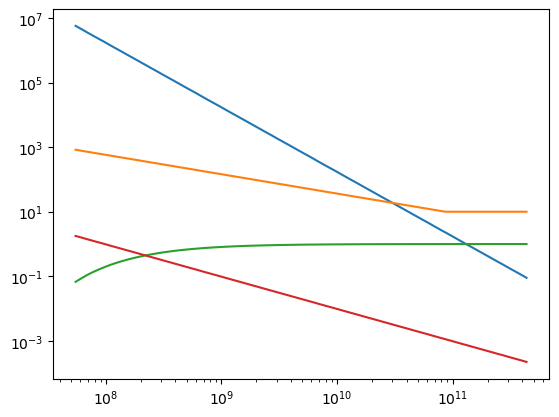

In [30]:
p = np.array(p)

plt.loglog(dt,p)

plt.show()

In [31]:
p[0]

array([5.689e+06, 8.290e+02, 6.754e-02, 1.781e+00])

### ChemTorch - torch ode solver

In [24]:
## torchode implementation
dirname_torch = 'bm_torch'
dirs_torch = listdir(outpath+dirname_torch+'/')
dirs_torch.remove('meta.json')
dirs_torch = natsorted(dirs_torch)

In [25]:
abs_t = []
p_t = []
dt_t = []
solver_time_t = []
overhead_t = []

for i in range(len(dirs_torch)):
    chem = modclass.ChemTorchMod(dirname_torch, dirs_torch[i])
    abs_t.append(chem.n.T[-1])
    dt_t.append(chem.tstep[-1])
    p_t.append(chem.p)
    solver_time_t.append(chem.tictoc[0])
    overhead_t.append(chem.tictoc[1])

abs_t = np.array(abs_t)
p_t = np.array(p_t)
dt_t = np.array(dt_t)
solver_time_t = np.array(solver_time_t)
overhead_t = np.array(overhead_t)

In [65]:
abs_t[10]

array([ 4.94065646e-324,  0.00000000e+000,  0.00000000e+000,
        6.30385077e-316,  9.38724727e-323,  6.36598737e-314,
       -4.94065646e-324,  2.12199579e-314,  0.00000000e+000,
        0.00000000e+000,  6.90646962e-310,  6.47228407e-316,
        0.00000000e+000,  2.12199377e-314,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        6.48403374e-316,  0.00000000e+000,              nan,
        0.00000000e+000,              nan,  6.48403908e-316,
        6.48403888e-316,  6.48404046e-316,  2.12199579e-314,
                    nan,  0.00000000e+000,  6.48404204e-316,
        4.24399158e-314,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,              nan,  6.48411200e-316,
        7.41098469e-323,  6.36598737e-314,  4.94065646e-324,
        2.12199579e-314,  0.00000000e+000,  0.00000000e+000,
        2.03159794e-320,  5.13828272e-321,              nan,
        0.00000000e+000,              nan,              nan,
                    nan,

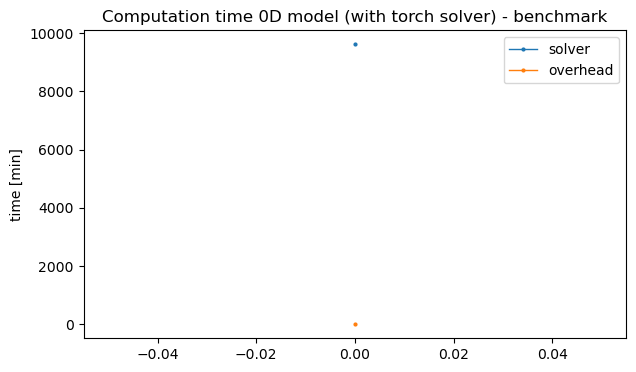

In [26]:
fig, ax1 = plt.subplots(figsize = (7,4)) 
ax1.set_title('Computation time 0D model (with torch solver) - benchmark')

ax1.plot(solver_time_t * 1./60., '-o',ms = 2,lw = 1, label = 'solver')
ax1.plot(overhead_t * 1./60.  , '-o',ms = 2,lw = 1, label = 'overhead')

ax1.set_ylabel('time [min]')

plt.legend()
plt.show()

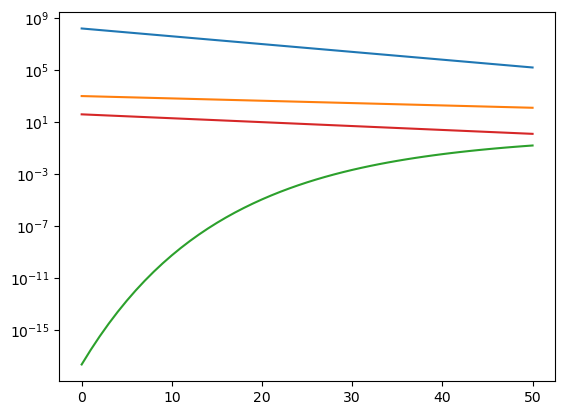

In [58]:

plt.plot(p_t)

plt.yscale('log')

plt.show()

## Plotting the benchmark

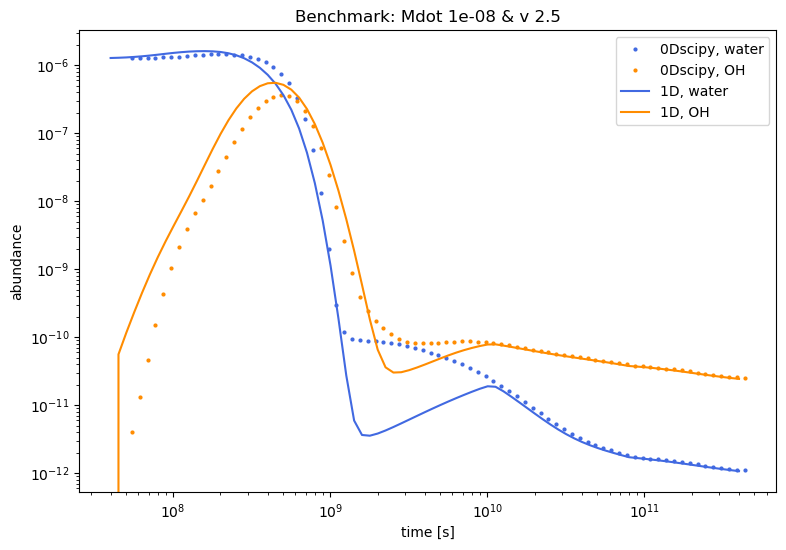

In [13]:
fig, ax1 = plt.subplots(figsize = (9,6)) 


i = 36
j = 30

ms = 2


ax1.set_title('Benchmark: Mdot '+str(meta['Mdot'])+' & v '+str(meta['v']))

ax1.plot(dt,abs.T[i], 'o', ms=ms, label = '0Dscipy, water', c= 'royalblue')
ax1.plot(dt,abs.T[j], 'o', ms=ms, label = '0Dscipy, OH', c= 'darkorange')

# ax1.plot(abs_t[i], '-.', label = '0Dtorch, water')
# ax1.plot(abs_t[j], '-.', label = '0Dtorch, OH')

ax1.plot(CSEmodel.time/10,CSEmodel.n.T[i], '-', label = '1D, water', c= 'royalblue')
ax1.plot(CSEmodel.time/10,CSEmodel.n.T[j], '-', label = '1D, OH' ,c= 'darkorange')


ax1.set_yscale('log')
ax1.set_xscale('log')
# ax1.set_ylim([1e-20,1e-2])

ax1.set_xlabel('time [s]')
ax1.set_ylabel('abundance')

ax1.legend()



plt.show()